In [39]:
from audiotsm import phasevocoder
from audiotsm.io.wav import WavReader, WavWriter
import os
import numpy as np
from scipy.io.wavfile import read
from scipy import signal, fft
import matplotlib.pyplot as plt
import cv2
import librosa
import librosa.display


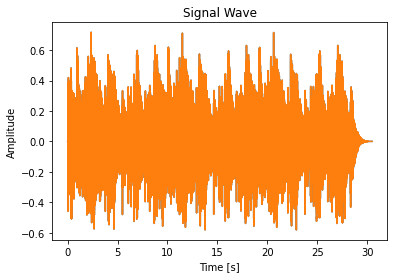

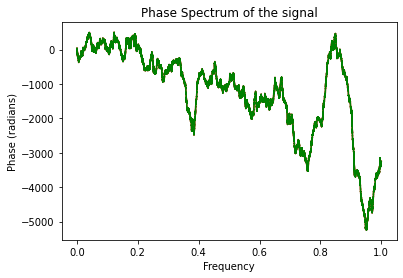

In [40]:
# Input and plot waveform
audio_arr, fs = librosa.load("./audio/input/piano.wav")
length = audio_arr.shape[0]/fs
time = np.linspace(0., length, audio_arr.shape[0])

plt.figure(1)
plt.title("Signal Wave")
plt.plot(time, audio_arr, label="Left channel")
plt.plot(time, audio_arr, label="Right channel")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

plt.figure(2)
plt.phase_spectrum(audio_arr, color="red")
plt.phase_spectrum(audio_arr, color="green")
plt.title("Phase Spectrum of the signal")
plt.show()

(1314,)
(1314,)
(1025, 1314)


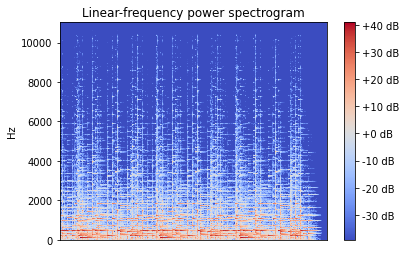

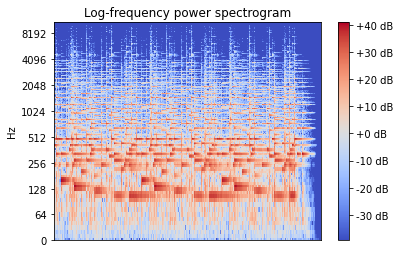

In [41]:
#Compute STFT of signal with same parameters of tsm phase vocoder algorithm

# Phase vocoder parameters
# frame_length = 2048
# window = hanning(frame_length)
# synthesis_hop = frame_length/4 = 512

spectrogram = librosa.amplitude_to_db(np.abs(librosa.stft(audio_arr, n_fft=2048, hop_length=512, win_length=2048, window='hann')))
print(spectrogram[0].shape)
print(spectrogram[1].shape)
print(spectrogram.shape)

fig_lin = plt.figure()
librosa.display.specshow(spectrogram, y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')
fig_lin.savefig('lin_spec_unc.png')

fig_log = plt.figure()
librosa.display.specshow(spectrogram, y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Log-frequency power spectrogram')
fig_log.savefig('log_spec_unc.png')